<br><br><center><h1 style="font-size:2em;color:#2467C0">Caso de estudio:  Reconocimiento de dígitos escritos a mano  </h1></center>
<br>

Esta proyecto usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve a continuación:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figura.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

60,000 imagenes son usadas para entrenamiento y 10,000 imagenes son usadas para evaluación. Es posible acceder al set de Fashion MNIST directamente desde TensorFlow. 

Las *etiquetas* son un arreglo de enteros, que van del 0 al 9 y cada una tiene su correspondencia como se muestra a continuación:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top (Playera o top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pants (Pantalones)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover (Sudadera)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress (Falda o vestido)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat (Abrigo)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal (sandalia)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt (Camisa)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker (Zapatos deportivos)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag (Bolso o mochila)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot (Botines)</td>
  </tr>
</table>



# 1. Configuración inicial

In [3]:
! cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [4]:
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Obtención y preparación de datos 

In [5]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# 3. Analisis explotario

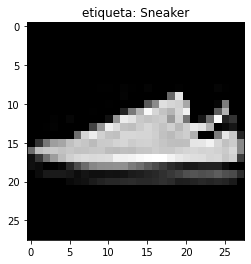

In [8]:
# Graficar algun elemento
i=6
plt.imshow(train_images[i], cmap="gray")
plt.title('etiqueta: ' + str(  class_names[train_labels[i]]   ) )
plt.show()

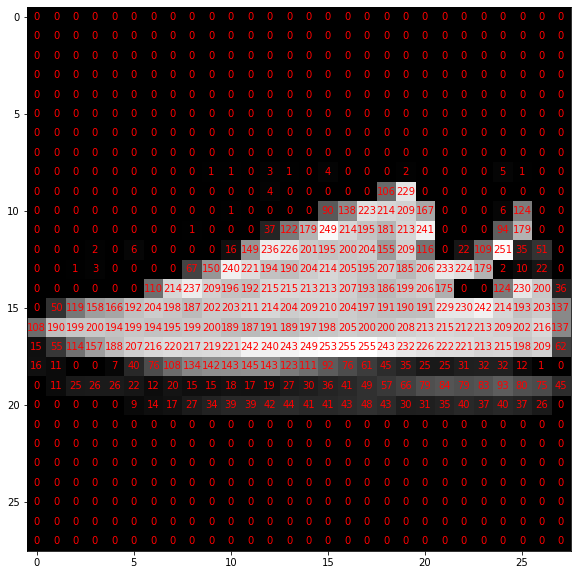

In [9]:
i=6
plt.figure(figsize=(10,10))
plt.imshow(train_images[i], cmap="gray")
for (j,i),label in np.ndenumerate(train_images[i]):
    plt.text(i,j,label,ha='center',va='center',color='red')
plt.show()

## 3.1 Re-escalamiento de los pixeles

Es necesario re-escalar estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Dividir los valores por 255. Es importante aplicarlo a ambos al de training  y al de testing.

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

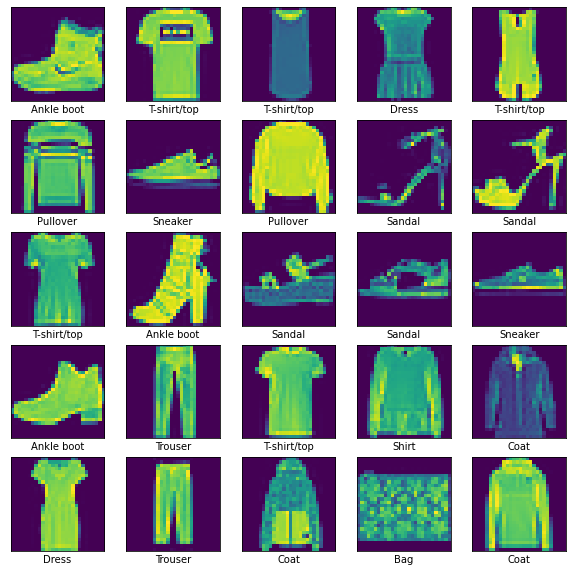

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 4. Definición del Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilarlo.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28) ),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])



# 5. Configuración del proceso de aprendizaje 

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

## 5.1 Parámetros del modelo 

In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


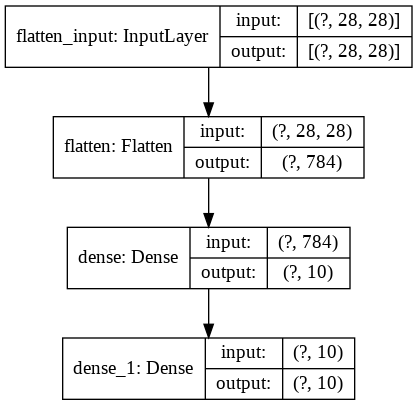

In [15]:
keras.utils.plot_model(model,  show_shapes=True)

# 6. Entrenamiento del modelo

In [16]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0137 - accuracy: 0.7271
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5643 - accuracy: 0.8191
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4790 - accuracy: 0.8370
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4426 - accuracy: 0.8474
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8536
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4081 - accuracy: 0.8576
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3983 - accuracy: 0.8605
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3919 - accuracy: 0.8628
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3852 - accuracy: 0.8650
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.381

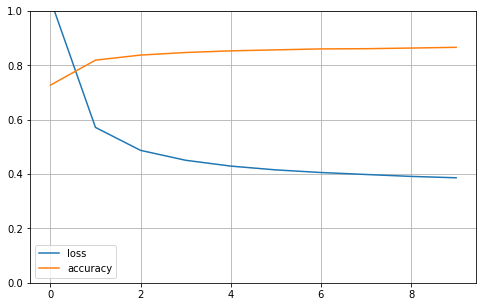

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 7. Evaluación del modelo

In [16]:
#Evaluación del modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\n\n Porcentaje de aciertos:', test_acc)

313/313 [==============================] - 0s 853us/step - loss: 0.4314 - accuracy: 0.8512


 Porcentaje de aciertos: 0.8511999845504761


In [ ]:
# Predicción en la muestra de prueba
predictions = model.predict(test_images)


In [ ]:
#Función de ayuda para visualizacion de resultados de prediccion
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[9 2 1 ... 8 1 5]


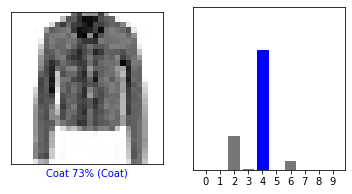

In [ ]:
#Ver el resultado de la predicción en la imagen con indice=10
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
print(test_labels)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

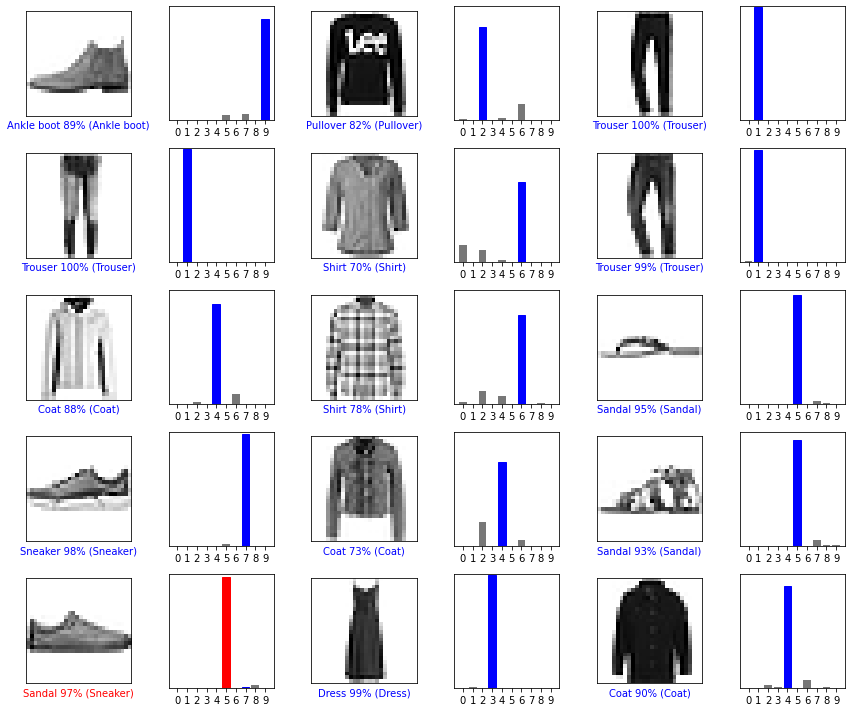

In [ ]:
#Ver el resultado de la predicción en las primeras 15 imagenes 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Probar nuestro set de imagenes

In [ ]:
# Libreria para cargar nuestro drive
from google.colab import drive

# Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/FashionMnist"

etiquetas_prendas.npy	panam2.jpg   proyecto_fashion_mnist.ipynb
mochila2.jpg		panam.jpg    sandalias.jpg
mochila.jpg		playera.png  wolverine.jpg
muestra_imagenes.ipynb	prendas.npy


In [ ]:
imagenes = ['panam.jpg','sandalias.jpg','mochila.jpg', 'playera.png', 'wolverine.jpg','']

In [ ]:
#Cargamos los arreglos de numpy
prendas=np.load("/content/drive/My Drive/files_prendas/prendas.npy")
etiquetas_prendas=np.load("/content/drive/My Drive/files_prendas/etiquetas_prendas.npy")

In [ ]:
#Re-escalamos los resultados
prendas=prendas/255

In [ ]:
#Realizamos la predicción
predictions = model.predict(prendas)


In [ ]:
#Inicializamos algunas variables que ayudaran en la visualizacion 
test_labels= etiquetas_prendas
test_images=prendas

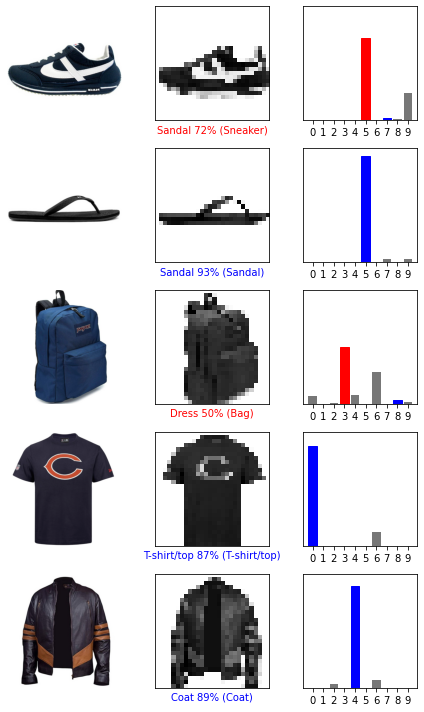

In [ ]:
import matplotlib.image as mpimg
import cv2 as cv
from matplotlib import pyplot as plt

#Mostramos el resultado de la predicción 
num_rows = 5
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*(2*num_cols+1), 2*num_rows))
for i in range(num_images):
  plt.subplot(5, 3, 3*i+1)
  img = cv.imread('/content/drive/My Drive/FashionMnist/'+imagenes[i])
  plt.axis("off")
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.subplot(num_rows, 3, 3*i+2)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 3, 3*i+3)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()